In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../dataset/Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# data[['Annual Income (k)', 'Spending Score (1-100)']]
# data.loc[4]

In [7]:
x = data[['Annual Income (k)', 'Spending Score (1-100)']]
# x = data.iloc[:, 3:]

In [8]:
x.sample(5)

,Annual Income (k),Spending Score (1-100)
159,78,73
0,15,39
126,71,35
183,98,88
191,103,69


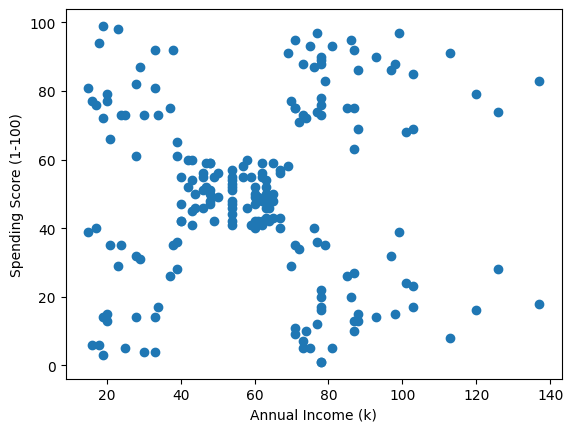

In [9]:
plt.scatter(x['Annual Income (k)'], x['Spending Score (1-100)'])
plt.xlabel('Annual Income (k)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [10]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [11]:
sse = [] # sum of squared errors

for clusters in range(1, 10):
    k = KMeans(n_clusters=clusters)
    k.fit(x)
    sse.append(k.inertia_)

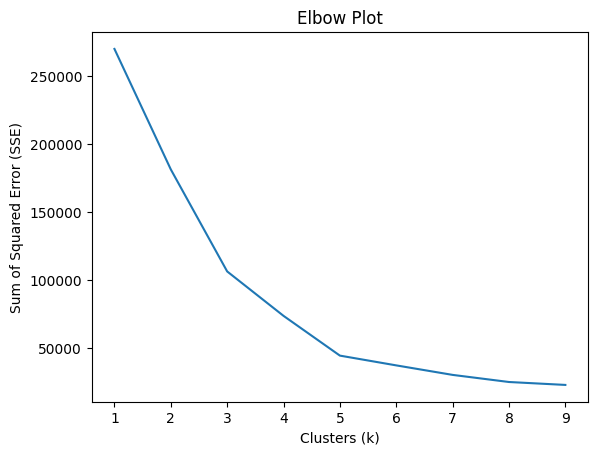

In [12]:
plt.plot(range(1, 10), sse)
plt.xlabel('Clusters (k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.title('Elbow Plot')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=666)

In [14]:
kmeans.fit(x)

KMeans(n_clusters=5, random_state=666)

In [15]:
x.head()

,Annual Income (k),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [16]:
cluster_labels = kmeans.labels_
cluster_labels[:5]

array([2, 4, 2, 4, 2])

In [17]:
x = x.values

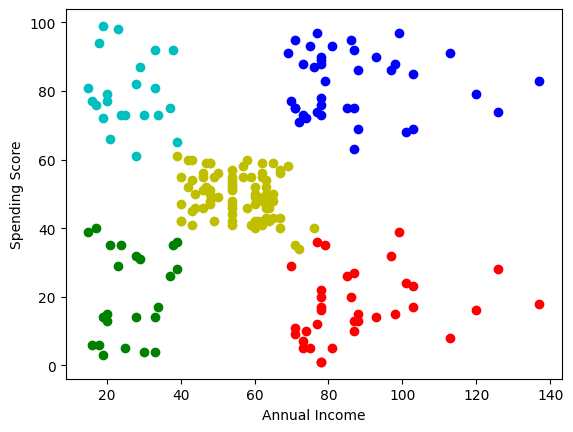

In [18]:
plt.scatter(x[cluster_labels==0, 0], x[cluster_labels==0, 1], c='r')
plt.scatter(x[cluster_labels==1, 0], x[cluster_labels==1, 1], c='b')
plt.scatter(x[cluster_labels==2, 0], x[cluster_labels==2, 1], c='g')
plt.scatter(x[cluster_labels==3, 0], x[cluster_labels==3, 1], c='y')
plt.scatter(x[cluster_labels==4, 0], x[cluster_labels==4, 1], c='c')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [19]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636]])

In [20]:
pred_data = [[100, 5], [40, 10,], [50, 20]]

In [21]:
kmeans.predict(pred_data)

array([0, 2, 2])

In [22]:
agglo = AgglomerativeClustering(n_clusters=5)
agglo.fit(x)
cluster_labels = agglo.labels_

In [23]:
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [24]:
cluster_labels[:5]

array([4, 3, 4, 3, 4], dtype=int64)

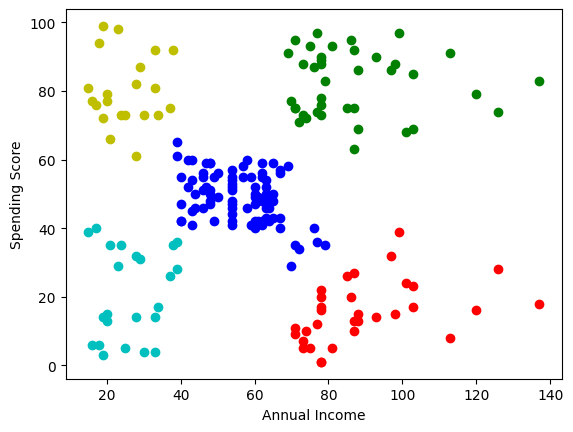

In [25]:
plt.scatter(x[cluster_labels==0, 0], x[cluster_labels==0, 1], c='r')
plt.scatter(x[cluster_labels==1, 0], x[cluster_labels==1, 1], c='b')
plt.scatter(x[cluster_labels==2, 0], x[cluster_labels==2, 1], c='g')
plt.scatter(x[cluster_labels==3, 0], x[cluster_labels==3, 1], c='y')
plt.scatter(x[cluster_labels==4, 0], x[cluster_labels==4, 1], c='c')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [26]:
image = plt.imread('../dataset/image.jpg')

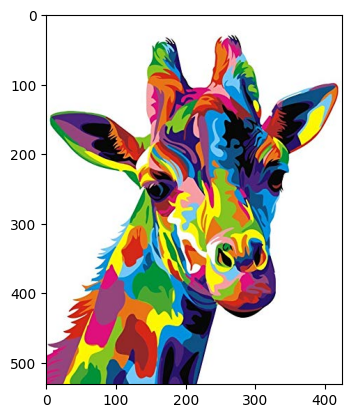

In [27]:
plt.imshow(image)
plt.show()

In [28]:
image.shape

(531, 425, 3)

In [29]:
13 * 100 * 100

130000

In [30]:
image = image / 255

In [31]:
h, w, dim = image.shape

In [32]:
[[1,2],
[3, 4]]
[1, 2, 3, 4]
image = image.reshape(h*w, dim)
image.shape

(225675, 3)

In [33]:
compressor = KMeans(n_clusters=3)
compressor.fit(image)

KMeans(n_clusters=3)

In [34]:
compressor.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
compressor.cluster_centers_

array([[0.97818942, 0.98477151, 0.9874958 ],
       [0.11806337, 0.27833006, 0.38428449],
       [0.75268866, 0.4734268 , 0.23098267]])

In [36]:
new_image = compressor.cluster_centers_[compressor.labels_]

In [37]:
new_image = new_image.reshape(h, w, dim)

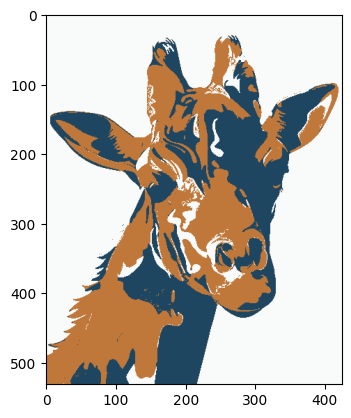

In [38]:
plt.imshow(new_image)
plt.show()